In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import sys
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
kickstarter_2018 = pandas.read_csv('C:/Users/papa/Documents/diplodatos/datasets/ks-projects-201801.csv')

In [4]:
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
kickstarter_2018.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

#### Ejercicio 1:
    
Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [6]:
dupli = kickstarter_2018[kickstarter_2018.duplicated('name', keep=False)].dropna()
dupli_sort = dupli.sort_values('name')
dupli_sort

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1,US,25.00,1.00,100000.00
149726,1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.0,2014-07-29 13:12:21,11260.0,canceled,7,US,11260.00,11260.00,15000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9,US,7248.00,7248.00,20000.00
125533,1637334549,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,GBP,2014-03-04,14000.0,2014-02-02 16:00:57,225.0,canceled,7,GB,369.89,377.33,23478.12
81299,1413519345,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,USD,2014-03-26,9000.0,2014-03-01 19:32:15,1010.0,canceled,25,US,1010.00,1010.00,9000.00


#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [7]:
from hashlib import md5

In [68]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


dupli_hash=dupli_sort['name'].apply(hashit)
dupli_hash

342920    0c7a251ffe4c7834cbc4b04906952ff1
342692    0c7a251ffe4c7834cbc4b04906952ff1
2024      67554ab4203d95f2f2f05365f768206e
322671    67554ab4203d95f2f2f05365f768206e
173036    19a82bc4c5961834282575d07d9b5f7c
265864    19a82bc4c5961834282575d07d9b5f7c
149726    b4ca2044f21f67e13ddb7583f59189a7
352573    b4ca2044f21f67e13ddb7583f59189a7
125533    24873b2974fe8222256c6cc800a2b361
81299     24873b2974fe8222256c6cc800a2b361
116262    5f38010cf3ee47694a209c9a8403acfa
129341    5f38010cf3ee47694a209c9a8403acfa
377887    b2226ed5c4031a0c849ac470e9910f7d
324335    b2226ed5c4031a0c849ac470e9910f7d
243132    2587a1a381b7ff6d58e564532406b035
4560      2587a1a381b7ff6d58e564532406b035
284400    0e9a80859587c8f75672828db5fb9118
197968    0e9a80859587c8f75672828db5fb9118
43855     2727d1da48d26f0f96b6e1d6e591c447
223012    2727d1da48d26f0f96b6e1d6e591c447
32541     2f5461a57595a43b7cf881f2437530c0
119314    2f5461a57595a43b7cf881f2437530c0
274179    f5bf4d1249bab6ed246b5e020619f6f8
161873    f

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [9]:
# helpful character encoding module
import chardet
import string
import ftfy.badness as bad

In [10]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1].count()

ID                  26
name                26
category            26
main_category       26
currency            26
deadline            26
goal                26
launched            26
pledged             26
state               26
backers             26
country             26
usd pledged         26
usd_pledged_real    26
usd_goal_real       26
name_weirdness      26
dtype: int64

In [11]:
kickstarter_2018b = pandas.read_csv('C:/Users/papa/Documents/diplodatos/datasets/ks-projects-201801.csv', encoding='iso-8859-1')

kickstarter_2018b['name_weirdness'] = kickstarter_2018b['name'].apply(weird)
kickstarter_2018b[kickstarter_2018b['name_weirdness'] > 1].count()

ID                  7682
name                7682
category            7682
main_category       7682
currency            7682
deadline            7682
goal                7682
launched            7682
pledged             7682
state               7682
backers             7682
country             7682
usd pledged         7615
usd_pledged_real    7682
usd_goal_real       7682
name_weirdness      7682
dtype: int64

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [12]:
from sklearn import preprocessing

In [13]:
kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


In [14]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [15]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [16]:
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,13,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,13,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,13,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0


In [17]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head(10)

C:\Users\papa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0


In [18]:
from sklearn.preprocessing import LabelBinarizer

In [19]:
other_column = 'currency'

lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018[other_column])
pandas.DataFrame(lb_results, columns=((other_column + '_') + pandas.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [20]:
kickstarter_2018.groupby('state').size()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
dtype: int64

In [54]:
df = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
72483,1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,0
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,0
232422,251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,0
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,0
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,0


In [66]:
df['pledged'] / df['goal'], 1-(df['pledged'] / df['goal']) 

(72483     0.999914
 151490    0.853222
 232422    0.999956
 275777    0.999830
 335859    0.995700
 dtype: float64, 72483     0.000086
 151490    0.146778
 232422    0.000044
 275777    0.000170
 335859    0.004300
 dtype: float64)

In [24]:
df = kickstarter_2018[['main_category', 'state']]
df = df.assign(cant=lambda x: 1)

df.pivot_table(aggfunc=numpy.count_nonzero, index='state',columns='main_category')

cant                                                         \
main_category      Art  Comics  Crafts   Dance   Design  Fashion Film & Video   
state                                                                           
canceled        2222.0   842.0   843.0   163.0   4152.0   2650.0       5755.0   
failed         14131.0  4036.0  5703.0  1235.0  14814.0  14182.0      32904.0   
live             194.0    76.0    76.0    18.0    305.0    250.0        332.0   
successful     11510.0  5842.0  2115.0  2338.0  10550.0   5593.0      23623.0   
suspended         96.0    23.0    72.0    13.0    247.0    138.0        117.0   
undefined          NaN     NaN     NaN     1.0      2.0      3.0        854.0   

                                                                            \
main_category     Food    Games Journalism    Music Photography Publishing   
state                                                                        
canceled        2211.0   6202.0      523.0   3305.0       986.0     3602.0   
failed         15969.0  16003.0     3137.0  21752.0      6384.0    23145.0   
live             184.0    287.0       31.0    281.0        48.0      299.0   
successful      6085.0  12518.0     1012.0  24197.0      3305.0    12300.0   
suspended        153.0    220.0       52.0    149.0        55.0       66.0   
undefined          NaN      1.0        NaN   2234.0         1.0      462.0   

                                  
main_category Technology Theater  
state                             
canceled          4715.0   608.0  
failed           20616.0  3708.0  
live               377.0    41.0  
successful        6434.0  6534.0  
suspended          424.0    21.0  
undefined            3.0     1.0

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [25]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0,2014-06-21 22:34:21,285.00,failed,5,CA,263.41,264.67,3.575409e+06,0
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.0,2015-07-07 21:14:52,0.00,failed,0,IT,0.00,0.00,5.568983e+06,0
3140,1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.0,2016-02-27 13:08:01,15.00,failed,6,ES,16.59,17.10,1.710454e+07,-1
5076,1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.0,2013-10-08 23:16:26,0.00,canceled,0,US,0.00,0.00,1.000000e+07,0
5759,1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.0,2016-09-26 18:08:01,1.00,canceled,1,US,0.00,1.00,2.000000e+07,0
6161,1031487313,Music app ( Pupilize) is the next big thing fo...,Music,Music,USD,2017-02-07,5000000.0,2017-01-08 06:49:52,0.00,failed,0,US,0.00,0.00,5.000000e+06,0
9157,1046235166,Duel,Science Fiction,Film & Video,USD,2016-03-06,10000000.0,2016-01-06 15:00:11,100.00,failed,2,US,100.00,100.00,1.000000e+07,0
10449,1052555922,Cloud Based Project Analytics Dashboards,Software,Technology,USD,2017-03-05,10000000.0,2017-03-04 01:25:03,25.00,failed,1,US,25.00,25.00,1.000000e+07,0
12517,1062809925,Turn a Blind Eye,Narrative Film,Film & Video,GBP,2014-02-21,4000000.0,2013-12-23 22:36:10,0.00,failed,0,GB,0.00,0.00,6.671448e+06,0
13803,106947703,Help FYFC Podcasts Buy a Harrier,Documentary,Film & Video,CAD,2014-10-21,4000000.0,2014-08-22 05:07:15,0.00,failed,0,CA,0.00,0.00,3.568243e+06,0


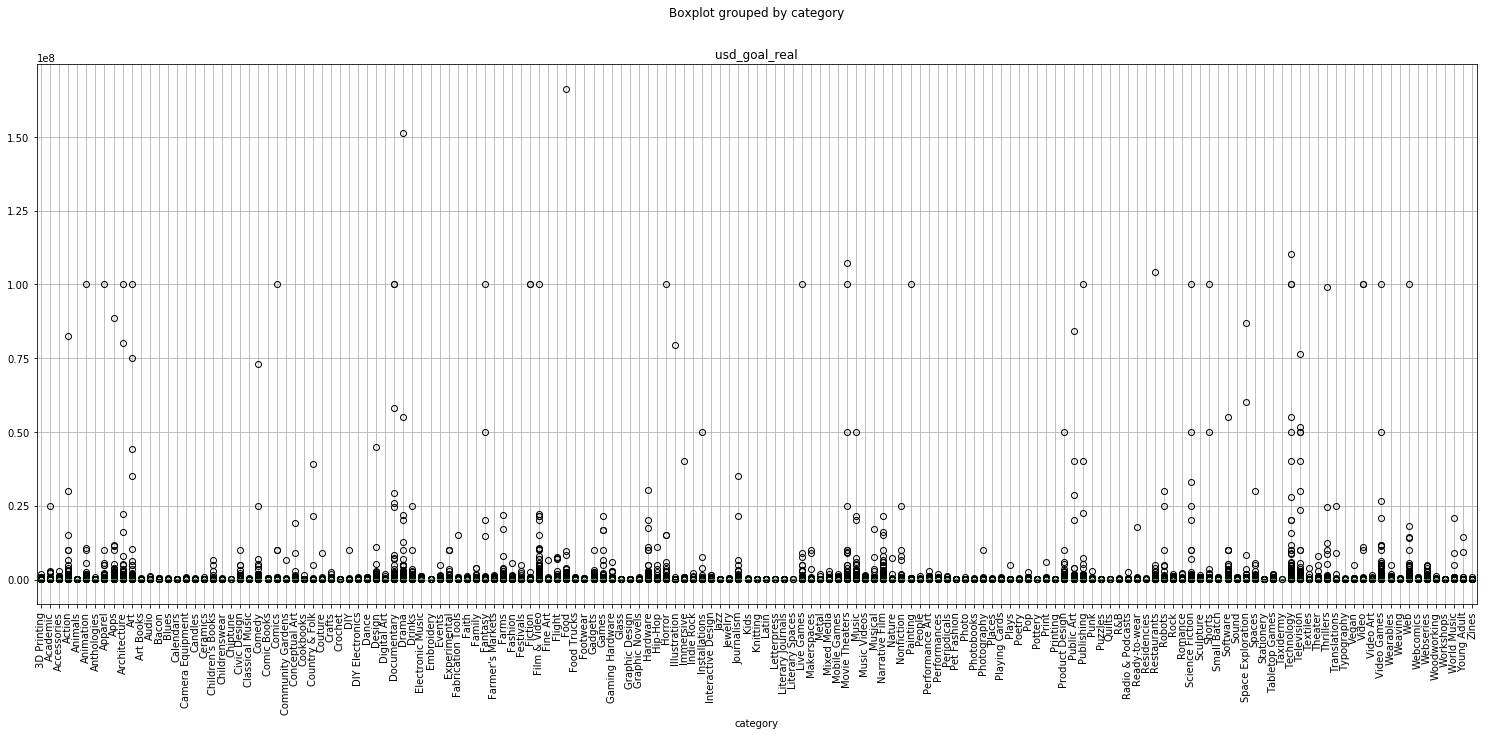

In [50]:
#con outliers
kickstarter_2018.boxplot(column='usd_goal_real', by='category', rot=90, figsize = (25,10))

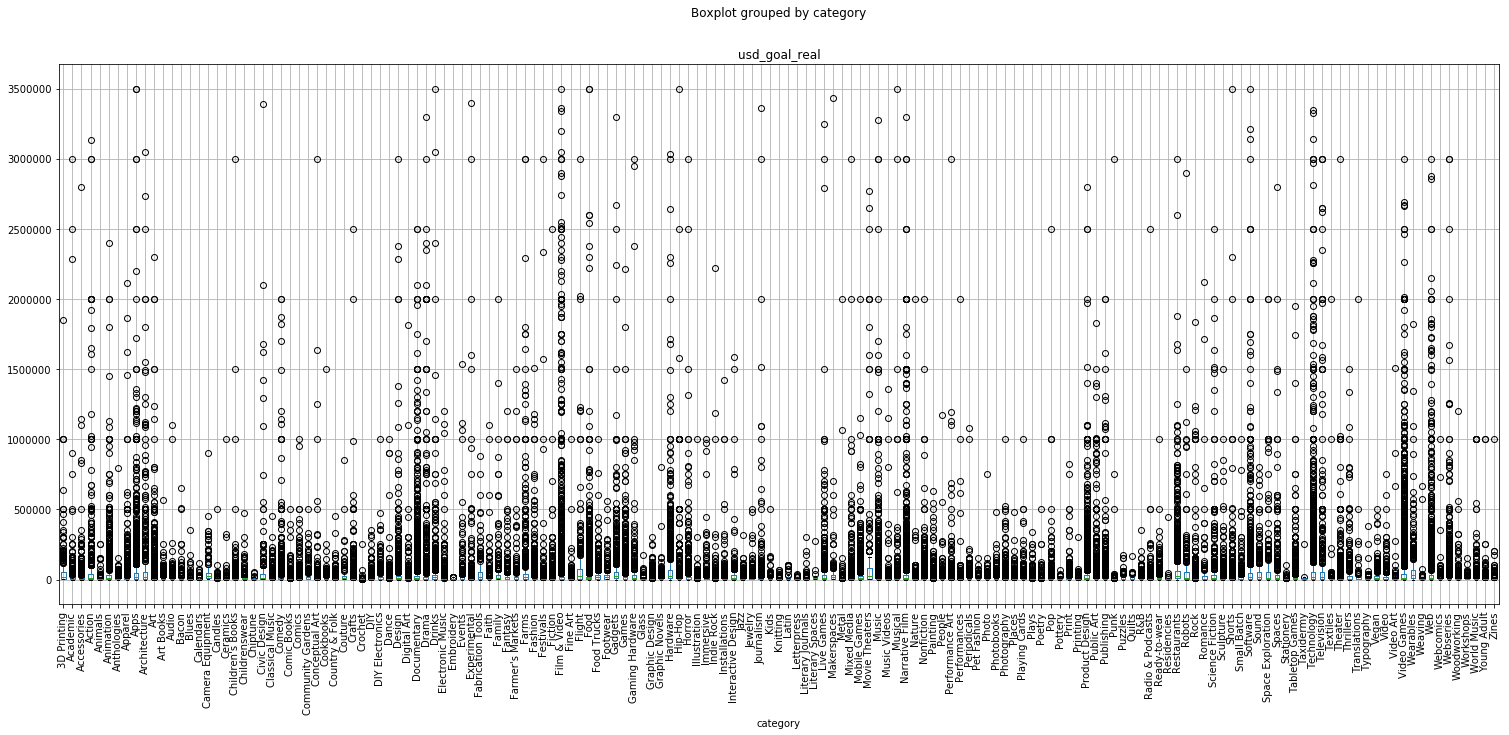

In [52]:
#sin outliers
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real', by='category', rot=90, figsize = (25,10))